# Artificial Intelligence Week 2

> Tags: #traveling-salesman-problem #tsp #artificial-intelligence #ai #python #jupyter-notebook

**Author:** [Liz](https://github.com/liz-cpu)

In [5]:
import matplotlib.pyplot as plt
import random
import time
import itertools
import math
from collections import namedtuple

## 1. TSP – ROUTE ALONG 500 CITIES

a) On Blackboard, you can find the Python script tsp_start.py



10 city tour with length 3648.9 in 1.062 secs for try_all_tours
Start plotting ...


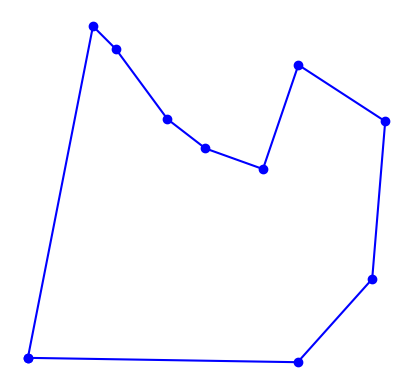

In [6]:
# based on Peter Norvig's IPython Notebook on the TSP

City = namedtuple('City', 'x y')


def distance(A: City, B: City) -> float:
    return math.hypot(A.x - B.x, A.y - B.y)


def try_all_tours(cities: frozenset) -> list:
    """
    Generate and test all tours of the cities and pick the shortest one.
    """
    tours = alltours(cities)
    return min(tours, key=tour_length)


def alltours(cities: frozenset) -> list[list]:
    """
    Return a list of tours (a list of lists), each tour a permutation of cities,
    and each one starting with the same city
    note: cities is a set, sets don't support indexing
    """
    start = next(iter(cities))
    return [[start] + list(rest) for rest in itertools.permutations(cities - {start})]


def tour_length(tour: list) -> float:
    """
    Calculate the total length of the tour
    """
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))


def make_cities(n: int, width: int = 1000, height: int = 1000):
    """
    Makes a set of n cities, each with random coordinates within a rectangle (width x height).
    The current system time is used as a seed
    note: if we used the same seed, we'd get the same set of cities
    """
    random.seed("hanze")
    return frozenset(City(random.randrange(width), random.randrange(height)) for c in range(n))

def plot_tour(tour: list) -> None:
    """
    Plot a tour, i.e. the order in which we visit the cities in the tour.
    Cities are represented as circles centred on their coordinates, and the tour
    is shown as lines joining the cities.
    """
    points = list(tour) + [tour[0]]
    plt.plot([p.x for p in points], [p.y for p in points], 'bo-')
    plt.axis('scaled')  # equal increments of x and y have the same length
    plt.axis('off')
    plt.show()


def plot_tsp(algorithm: callable, cities: frozenset) -> None:
    """
    Applies the given algorithm to cities, and visualises the results.
    """
    t0 = time.process_time()
    tour = algorithm(cities)
    t1 = time.process_time()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    print("Start plotting ...")
    plot_tour(tour)

plot_tsp(try_all_tours, make_cities(10))


Expand this program with a Nearest Neighbor (NN) algorithm so that a route is calculated along all cities. This can be done in approximately 10 lines of code. Test the program with 10 cities. How much percentage does the result of NN deviate from the optimal route? Tip: if you enter the same n in random.seed(n), you will get the same set of cities.

In [7]:
def nearest_neighbour(cities):
    """
    Using the nearest neighbour algorithm, find a tour starting from the first
    city and going to the nearest neighbour, etc.
    """
    cities = set(cities)  # defrost the cities
    start = next(iter(cities))  # the first city
    tour = [start]
    unvisited = cities - set([start])
    while unvisited:
        nearest = min(unvisited, key=lambda city: distance(city, tour[-1]))
        tour.append(nearest)
        unvisited.remove(nearest)
    return tour

10 city tour with length 3648.9 in 1.047 secs for try_all_tours
Start plotting ...


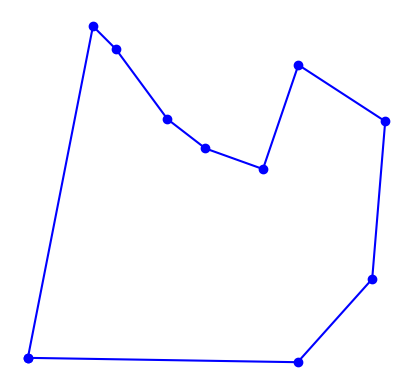

10 city tour with length 4164.1 in 0.000 secs for nearest_neighbour
Start plotting ...


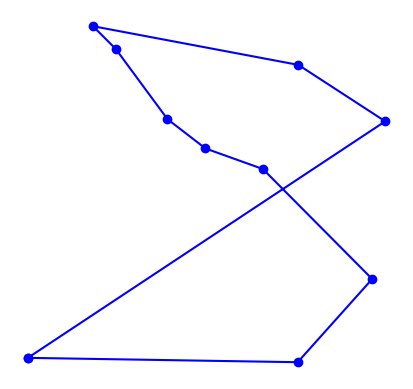

In [9]:
plot_tsp(try_all_tours, make_cities(10))
plot_tsp(nearest_neighbour, make_cities(10))


b) How long does the NN program take for a route with 500 cities, and what is the total length of the route?

c) When you try the NN program several times, you will notice that there are always some crossing roads (branches). How many pairs of branches are there in a route of N cities? Describe your strategy for finding crossing roads (branches). Provide an algorithm in pseudocode. Suppose you undo a crossing, is it necessary (according to your strategy) to check if the new route is shorter than the old one?

d) Create a program that takes 2 branches at a time, detects crossings, and optimizes the route based on this (2-opt). How much percent is your 2-opt algorithm better (shorter) than the NN algorithm with 500 cities? (Approximately 8% better on my desktop in about 2 seconds).

e) (1) What is the time complexity of the 2-opt algorithm?
(2) What does this mean? Suppose you test with 1000 nodes, and it takes (for example) 10 seconds, how long will it take with 2000 nodes?